# CP321 Project - Analysis of Ontario ICU Data through the COVID Pandemic
Jake Watts - 151477490
Evan Parisotto - 

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning) # supress PyArrow warning from pandas

df = pd.read_csv("data/region_hospital_icu_covid_data.csv")

df.head(10)

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-01,CENTRAL,51,39,115,0,0,0,0
1,2020-04-02,CENTRAL,57,52,129,0,0,0,0
2,2020-04-03,CENTRAL,65,57,148,0,0,0,0
3,2020-04-04,CENTRAL,65,55,161,0,0,0,0
4,2020-04-05,CENTRAL,73,58,154,0,0,0,0
5,2020-04-06,CENTRAL,83,68,167,0,0,0,0
6,2020-04-07,CENTRAL,85,68,167,0,0,0,0
7,2020-04-08,CENTRAL,92,73,177,0,0,0,0
8,2020-04-09,CENTRAL,88,73,182,0,0,0,0
9,2020-04-10,CENTRAL,90,77,185,0,0,0,0


## Introduction

[Data Source](https://data.ontario.ca/dataset/covid-19-cases-in-hospital-and-icu-by-ontario-health-region)

### Data Fields

| CSV Field           | Description                                                                                   |
|---------------------|-----------------------------------------------------------------------------------------------|
| `date`              | Date                                                                                          |
| `oh_region`         | Ontario Health Region                                                                                     |
| `hospitalizations`  | Current hospitalizations with COVID-19                                                        |
| `icu_crci_total`    | Current patients in Intensive Care Units (ICUs) due to COVID-related critical illness         |
| `icu_current_covid` | Patients in Intensive Care Units (ICUs) testing positive for COVID                            |
| `icu_former_covid`  | Current patients in Intensive Care Units (ICUs) no longer testing positive for COVID          |
| `icu_crci_total_vented` | Current patients in Intensive Care Units (ICUs) on ventilators due to COVID-related critical illness |
| `icu_current_covid_vented` | Current patients in Intensive Care Units (ICUs) on ventilators testing positive for COVID   |
| `icu_former_covid_vented` | Current patients in Intensive Care Units (ICUs) on ventilators no longer testing positive for COVID |

### Candidate Questions
1. **Hospitalization Time Series with Key Date Markers**
   - **Time Series** showing hospitalizations over time with annotations for key dates. We can tailor the question to the key dates we choose to use.
   - See if it makes sense to decompose the time series.
   - Use `hospitalizations` as the variable. Look up key dates through the range (2020-2024) separately. There's no need to cite here.

2. **Regional Differences in Ventilator Utilization**
   - **Choropleth Map** to visualize ventilator utilization intensity by region.
   - The more populous regions will obviously have more utilization, so maybe we could instead visualize the per-capital ventilator utilization.
   - Find coordinates for the OH regions.
   - Find population data for each of the OH regions through the time range.

## Motivation

### Question 1: Time Series

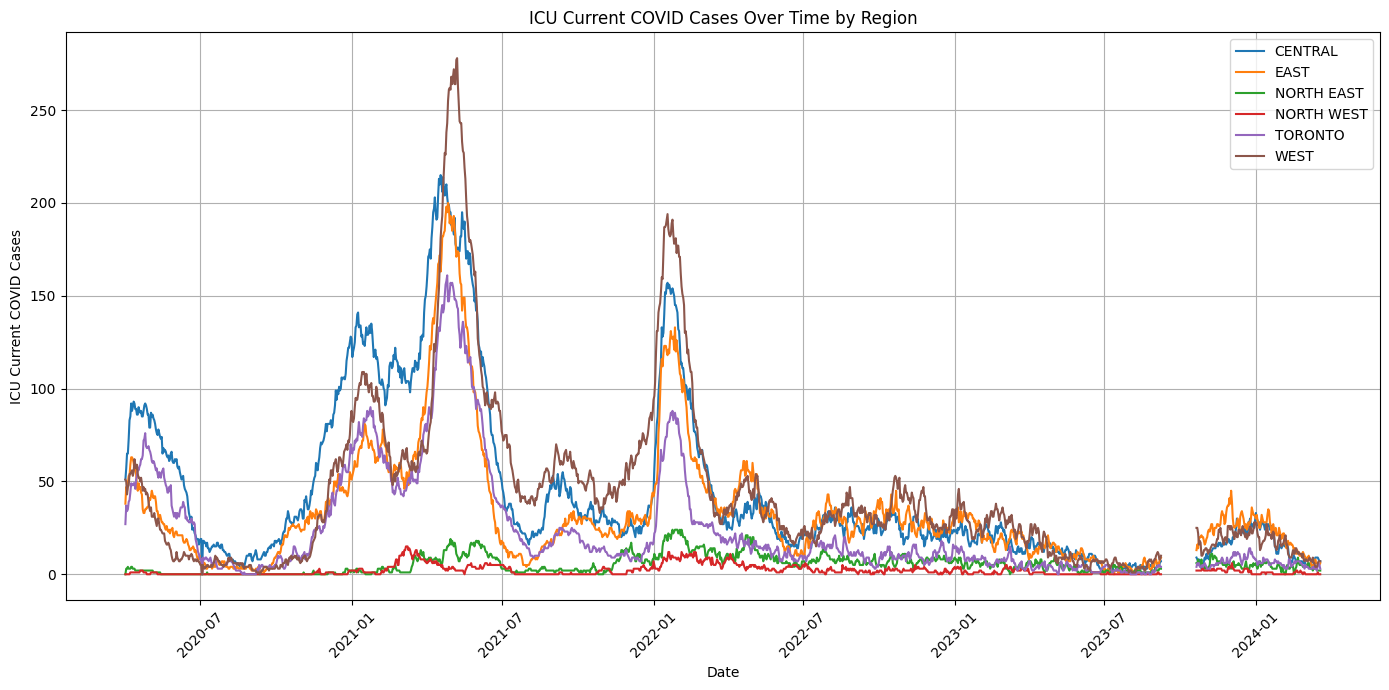

In [3]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Ensure numerical columns are treated as such
numerical_columns = ['icu_current_covid', 'icu_current_covid_vented', 'hospitalizations',
                     'icu_crci_total', 'icu_crci_total_vented', 'icu_former_covid', 'icu_former_covid_vented']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Plotting the trend of ICU current COVID cases over time
plt.figure(figsize=(14, 7))
for region in df['oh_region'].unique():
    region_data = df[df['oh_region'] == region]
    plt.plot(region_data['date'], region_data['icu_current_covid'], label=region)

plt.title('ICU Current COVID Cases Over Time by Region')
plt.xlabel('Date')
plt.ylabel('ICU Current COVID Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Misc Visualizations

<Axes: >

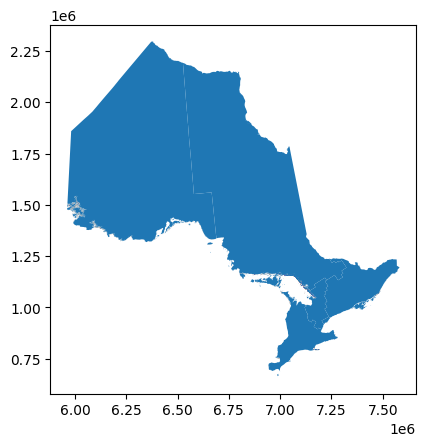

In [4]:
# Load the shapefile
gdf = gpd.read_file('data/ontario_health_region_boundaries.shp')

# Now 'gdf' is a GeoDataFrame that contains the geometry information along with any other attributes
gdf.plot()

In [8]:
gdf.head()

,OBJECTID,OH_Region_,OH_Name,OH_Name_FR,geometry
0,1,01,West,Ouest,"MULTIPOLYGON (((6988892.426 659741.309, 698890..."
1,10,04,East,Est,"MULTIPOLYGON (((7298417.620 974718.909, 729841..."
2,13,05,North East,Nord-Est,"MULTIPOLYGON (((7118925.511 1068041.823, 71189..."
3,14,06,North West,Nord-Ouest,"MULTIPOLYGON (((6658939.003 1265492.257, 66589..."
4,18,02,Central,Centre,"MULTIPOLYGON (((7147972.851 1008518.286, 71479..."


In [9]:
gdf.dtypes

OBJECTID         int64
OH_Region_      object
OH_Name         object
OH_Name_FR      object
geometry      geometry
dtype: object

Text(0, 0.5, 'Frequency')

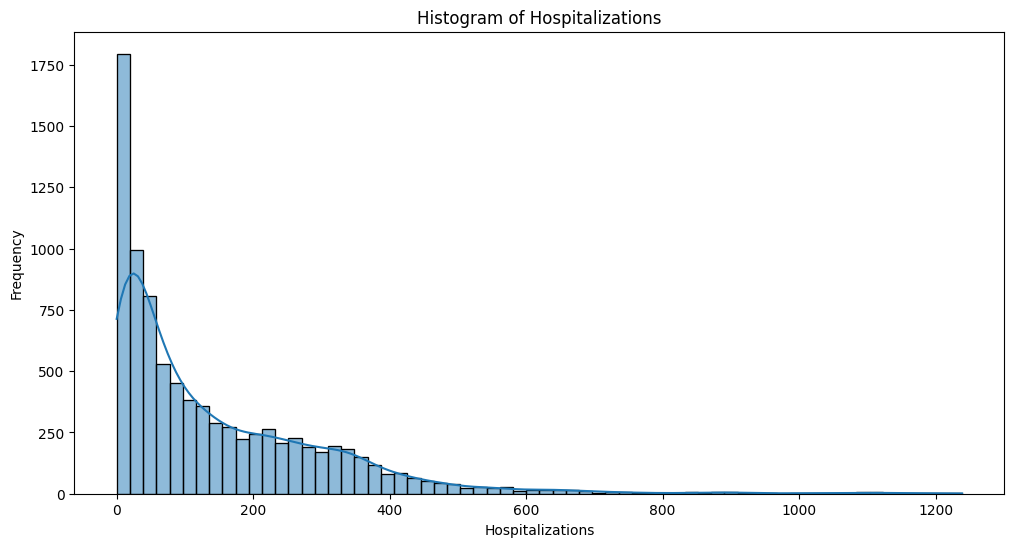

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['hospitalizations'], kde=True)
plt.title('Histogram of Hospitalizations')
plt.xlabel('Hospitalizations')
plt.ylabel('Frequency')

Text(0, 0.5, 'ICU CRCI Total')

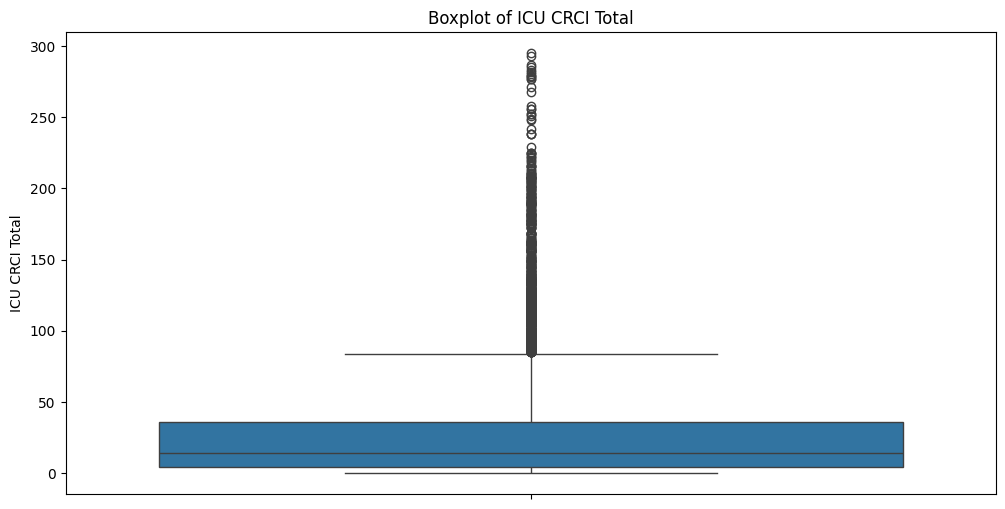

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['icu_crci_total'])
plt.title('Boxplot of ICU CRCI Total')
plt.ylabel('ICU CRCI Total')

Text(0, 0.5, 'Cumulative Probability')

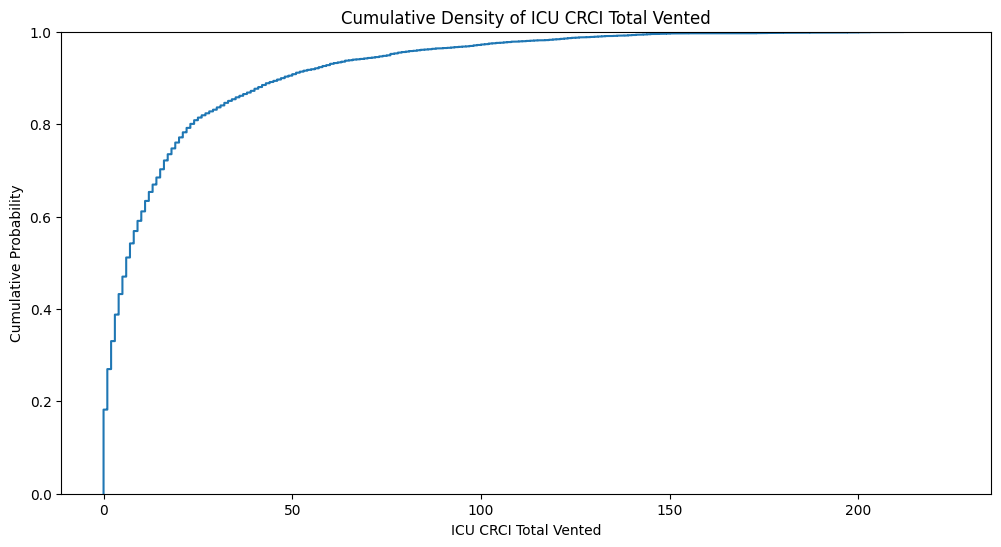

In [7]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['icu_crci_total_vented'])
plt.title('Cumulative Density of ICU CRCI Total Vented')
plt.xlabel('ICU CRCI Total Vented')
plt.ylabel('Cumulative Probability')

## Conclusion